In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from src.data.make_dataset import load_dossies_df
from src.data.make_metadados import load_dossies_metadados_df
from src.features.build_features import get_tfidf_features, get_tf_features
from src.models import train_model, predict_model, validate_model
from src.visualization.visualize import plot_dendrogram_Agglomerative, plot_dendrogram
from src.data.make_reports import export_df_to_json

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yuriserka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/yuriserka/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /home/yuriserka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
dossies = load_dossies_df()
len(dossies)

464

In [5]:
dossies.head()

,nome_do_arquivo,conteudo
0,10.txt,produção limpa produção limpa construção civil...
1,100.txt,técnico curtimento rede tecnologia bahia abril...
2,101.txt,técnico instalação pomar rede tecnologia bahia...
3,102.txt,técnico produção carvalho rede tecnologia bahi...
4,103.txt,técnico viveiro rede tecnologia bahia abril té...


In [6]:
dossies_metadados = load_dossies_metadados_df(dossies.nome_do_arquivo)
len(dossies_metadados)

nao ha metadados para o arquivo 250.txt


463

In [7]:
dossies_metadados.head()

,cnae_asunto,categoria,palavras_chave,resumo,data,instituicao_responsavel,assunto,titulo,cnae_dossie,nome_do_arquivo
0,3811,"[SBRT, ÁGUA,ESGOTO,GESTÃO DE RESÍDUOS, Coleta ...","[Aproveitamento de resíduo, construção civil,...",A indústria da Construção Civil contribui sign...,15/01/07,SENAI/RS - Serviço Nacional de Aprendizagem In...,Coleta de resíduos não-perigosos,Produção mais limpa no setor de construção civil,38,10.txt
1,1510,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Couros e C...","[Curtimento, couro, pele, peixe, rã]","Instalações para o processamento, máquinas e e...",31/05/07,IEL/BA- Instituto Euvaldo Lodi,Curtimento e outras preparações de couro,Curtimento de peles exóticas – peixes e rãs,15,100.txt
2,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Agricultura, pomar]","Caracterização da área apropriada: clima, água...",31/05/07,IEL/BA- Instituto Euvaldo Lodi,"Horticultura, exceto morango",Instalação de pomar,01,101.txt
3,1111,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Alimentos ...","[Bebida Alcoólica, licor]","Instalações para o processamento, aplicação do...",31/05/07,IEL/BA- Instituto Euvaldo Lodi,Fabricação de outras aguardentes e bebidas des...,Produção de licores,11,102.txt
4,0311,"[SBRT, PESCA E AQUICULTURA, Pesca]","[Camarão, carcinicultura, pesca, viveiro]",Procedimento de preparação e tratamento do sol...,31/05/07,IEL/BA- Instituto Euvaldo Lodi,Pesca de crustáceos e moluscos em água salgada,Preparação de viveiro – povoamento com camarões,03,103.txt


In [8]:
X, tfidf_feature_names = get_tfidf_features(dossies.conteudo)
X.shape

(464, 6361)

In [9]:
X_topics, tf_feature_names = get_tf_features(dossies.conteudo, n_features=1000)
X_topics.shape

(464, 1000)

In [10]:
aggl_clustering = train_model.agglomerative(X, distance_threshold=0, n_clusters=None, linkage='ward')
aggl_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

In [11]:
n_topics = 10
validate_model.print_top_words(train_model.lda(X_topics, n_topics), tf_feature_names, n_top_words=10)

Topic #0: produto alimentos produtos água processo produção leite temperatura qualidade técnicas
Topic #1: calçado tecido costura máquina nbr fôrma materiais ponto abnt fabricação
Topic #2: açúcar frutas álcool produção vinho água chocolate fermentação fruta suco
Topic #3: solo água produção cultivo planta controle al técnicas plantio brasileiro
Topic #4: papel fibra sisal bambu embalagem licuri folha teor produção processo
Topic #5: madeira fonte técnicas brasileiro processo serviço corte acesso tinta produção
Topic #6: resíduos ambiental processo produção meio ambiente ambientais produtos reciclagem técnicas
Topic #7: processo água técnicas brasileiro serviço fonte material óleo temperatura produtos
Topic #8: técnicas acesso serviço brasileiro fonte brasil trabalho sistema produtos água
Topic #9: cana coco cachaça caldo poda fonte bonsai bolsa desenho modelo



In [12]:
validate_model.print_top_words(train_model.nmf(X, n_topics), tfidf_feature_names, n_top_words=10)

Topic #0: serviço técnicas brasileiro água produtos acesso fonte processo produção produto
Topic #1: solo plantio planta cultivo colheita adubação al pragas irrigação controle
Topic #2: alimentos frutas produto açúcar alimento farinha fruta produtos fermentação embalagem
Topic #3: argila cerâmica queima vermelha secagem cerâmico massa forno secador peça
Topic #4: resíduos ambiental reciclagem limpa geração resíduo gerenciamento sólidos ambientais perigosos
Topic #5: cogumelo cultivo composto agaricus blazei medicinais rosa estufa micélio compostagem
Topic #6: carne animais criação animal ração abate sal manejo produção raça
Topic #7: calçado fôrma palmilha salto cad modelagem couro design ecodesign costura
Topic #8: leite queijo iogurte manteiga ordenha lactose creme doce soro microrganismos
Topic #9: madeira pintura mobiliário aglomerado mdf móvel chapa acabamento serra lixamento



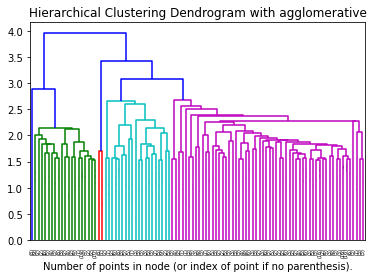

In [13]:
plot_dendrogram_Agglomerative(
    aggl_clustering,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    leaf_rotation=90,
    # leaf_font_size=12.,
    show_contracted=True    
)

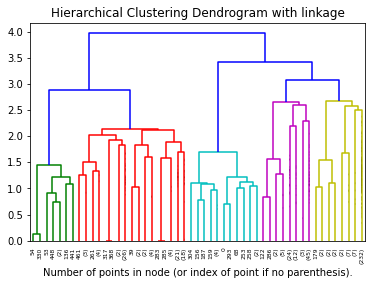

In [14]:
Z = train_model.linkage_matrix(X, method='ward')
plot_dendrogram(
    Z,
    truncate_mode='level',
    p=5,
    leaf_rotation=90,
    # leaf_font_size=12.,
    show_contracted=True
)

In [15]:
# a partir da analise do dendrograma plotada, 5 clusters parece uma boa escolha
n_clusters = 5
labels = predict_model.Z_labels(Z, t=n_clusters, criterion='maxclust')
labels

array([3, 5, 2, 5, 2, 5, 2, 4, 5, 4, 5, 2, 4, 5, 2, 2, 5, 5, 5, 2, 4, 4,
       5, 2, 4, 4, 5, 5, 2, 5, 5, 2, 4, 2, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5,
       5, 4, 5, 4, 4, 4, 2, 5, 5, 1, 1, 5, 2, 5, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 5, 5,
       5, 2, 5, 5, 2, 4, 5, 5, 2, 5, 2, 5, 5, 4, 5, 5, 2, 4, 5, 5, 4, 5,
       5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 2, 4, 4, 2, 5, 5, 2, 4, 2, 4, 5,
       4, 5, 5, 5, 1, 5, 5, 2, 5, 4, 2, 2, 2, 4, 2, 4, 2, 5, 2, 5, 5, 5,
       3, 5, 3, 3, 5, 3, 2, 4, 5, 4, 5, 2, 2, 2, 5, 2, 5, 5, 5, 4, 2, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 4, 4, 5, 5, 5, 4, 4,
       5, 5, 5, 2, 5, 4, 5, 2, 5, 2, 5, 5, 5, 5, 2, 5, 2, 4, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 2, 5, 4, 4, 5, 4, 5, 5,
       5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 5, 3, 5, 4, 2, 4, 3, 2, 5, 2, 4, 5,
       5, 5, 5, 5, 5, 5, 2, 5, 4, 2, 5, 4, 5, 4, 4, 4, 5, 2, 2, 2, 2, 2,
       4, 5, 1, 4, 5, 4, 5, 3, 5, 2, 5, 2, 2, 5, 5,

In [16]:
dossies_com_metadados = dossies.join(
    dossies_metadados.set_index('nome_do_arquivo'),
    on='nome_do_arquivo'
)

dossies_com_metadados = dossies_com_metadados.dropna()
len(dossies_com_metadados)

463

In [17]:
# Com os resultados dessa célula pode-se presumir que documentos com a label 2 está fortemente relacionado à questões de agricultura
cluster_2 = validate_model.checar_categoria(dossies_com_metadados, labels, 2)
cluster_2.info()
print(cluster_2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 461
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nome_do_arquivo          93 non-null     object
 1   conteudo                 93 non-null     object
 2   cnae_asunto              93 non-null     object
 3   categoria                93 non-null     object
 4   palavras_chave           93 non-null     object
 5   resumo                   93 non-null     object
 6   data                     93 non-null     object
 7   instituicao_responsavel  93 non-null     object
 8   assunto                  93 non-null     object
 9   titulo                   93 non-null     object
 10  cnae_dossie              93 non-null     object
dtypes: object(11)
memory usage: 8.7+ KB
   nome_do_arquivo                                           conteudo  \
2          101.txt  técnico instalação pomar rede tecnologia bahia...   
4          103.txt  

In [18]:
validate_model.checar_substring(cluster_2, 'titulo', 'cultivo')

,nome_do_arquivo,conteudo,cnae_asunto,categoria,palavras_chave,resumo,data,instituicao_responsavel,assunto,titulo,cnae_dossie
14,110.txt,técnico cultivo algodão vieira carvalho apoio ...,0139,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...","[Algodão, cultivo, agricultura, plantio, e...",Informações sobre o cultivo de algodão.,14/06/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de outras plantas de lavoura permanent...,Cultivo de Algodão,01
15,111.txt,técnico cultivo café orgânico apoio desenvolvi...,0134,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ou...","[Coffea arábica L, café orgânico, cafeicultu...",A cafeicultura orgânica está diretamente ligad...,15/06/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de café,Cultivo do Café Orgânico,01
23,119.txt,técnico cultivo goiaba vieira carvalho apoio d...,0133,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...","[Goiaba, cultivo, agricultura, fruta, frut...",Informações sobre o cultivo de goiaba.,26/06/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de frutas de lavoura permanente não es...,Cultivo de goiaba,01
28,124.txt,técnico cultivo processamento pimenta carvalho...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Alimento, beneficiamento, conserva, cultivo,...",Escolha e técnica de implantação de áreas cult...,29/06/07,IEL/BA- Instituto Euvaldo Lodi,"Horticultura, exceto morango",Cultivo e processamento de pimenta,01
36,131.txt,técnico cultivo ameixa vieira carvalho apoio d...,0133,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...","[Fruta, fruto carnoso, polpa de fruta, amei...",Informações sobre o cultivo da ameixa.,16/07/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de frutas de lavoura permanente não es...,Cultivo da Ameixa,01
40,136.txt,técnico cultivo bonsai matos apoio desenvolvim...,0122,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fl...","[Bonsai, técnica, espécie, estilo, árvore,...","Informação sobre o bonsai, espécies utilizadas...",20/07/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de flores e plantas ornamentais,Cultivo de Bonsai,01
58,152.txt,técnico cultivo morango apoio desenvolvimento ...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Fragaria, morango, morangueiro, época de pl...","O morango, hoje cultivado em larga escala, é o...",07/08/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de morango,Cultivo do Morango,01
59,153.txt,técnico cultivo corte ambiente protegido semi ...,0122,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fl...","[Cultivo, floricultura, rosa]",Dentro do universo da floricultura a flor mais...,14/08/07,IEL/BA- Instituto Euvaldo Lodi,Cultivo de flores e plantas ornamentais,Cultivo de rosas de corte em ambiente protegid...,01
115,206.txt,técnico cultivo laranja matos apoio desenvolvi...,0131,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...","[Laranja, cultivo, pragas, doenças, laranj...","Informações sobre plantio, cultivo, pragas e d...",04/10/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Cultivo de laranja,Cultivo de Laranja,01
121,211.txt,técnico cultivo apoio desenvolvimento tecnológ...,0220,"[SBRT, PRODUÇÃO FLORESTAL, Florestas Nativas]","[Castanha-do-Brasil, castanha-do-Pará, Brazi...",A castanha-do-Brasil tem importância social e ...,16/10/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,Coleta de castanha-do-pará em florestas nativas,Cultivo da castanha-do-Brasil,02


In [19]:
# Com os resultados dessa célula pode-se presumir que documentos com a label 1 está fortemente relacionado à questões de agricultura
cluster_1 = validate_model.checar_categoria(dossies_com_metadados, labels, 1)
cluster_1.head()

,nome_do_arquivo,conteudo,cnae_asunto,categoria,palavras_chave,resumo,data,instituicao_responsavel,assunto,titulo,cnae_dossie
53,148.txt,técnico colheita processamento medicinais come...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Cogumelo, colheita, controle de qualidade, ...",O consumo de cogumelos comestíveis e medicinai...,03/08/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Colheita e processamento de cogumelos comestív...,01
54,149.txt,técnico controle cultivo medicinais rosa funda...,0139,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...","[Cogumelo, contaminação de alimento, fungo, ...",Os cogumelos comestíveis e medicinais são prod...,29/03/11,CETEC - Fundação Centro Tecnológico de Minas G...,"Cultivo de plantas para condimento, exceto pim...",Controle de contaminações em processos de cult...,01
136,226.txt,técnico medicinais rosa fundação tecnológico m...,2121,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Produtos F...","[Cogumelo, cultivo, extrato aquoso, fungicu...",Algumas espécies de cogumelos possuem atividad...,01/11/07,CETEC - Fundação Centro Tecnológico de Minas G...,Fabricação de medicamentos alopáticos para uso...,Preparo de extratos de cogumelos medicinais,21
288,35.txt,técnico cultivo cogumelo sol rosa fundação tec...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Cogumelo, cogumelo do sol, cultivo, agricu...",Os fungos são seres vivos extremamente importa...,16/01/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Cultivo do “Cogumelo do Sol”,01
330,5650.txt,técnico controle cultivo medicinais rosa funda...,0161,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, At...","[Cogumelo, contaminação de alimento, fungo, ...",Os cogumelos comestíveis e medicinais são prod...,26/10/12,CETEC - Fundação Centro Tecnológico de Minas G...,Atividades de apoio à agricultura não especifi...,Controle de contaminações em processos de cult...,01


In [20]:
validate_model.checar_substring(cluster_1, 'titulo', r'cogumelos?')

,nome_do_arquivo,conteudo,cnae_asunto,categoria,palavras_chave,resumo,data,instituicao_responsavel,assunto,titulo,cnae_dossie
53,148.txt,técnico colheita processamento medicinais come...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Cogumelo, colheita, controle de qualidade, ...",O consumo de cogumelos comestíveis e medicinai...,03/08/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Colheita e processamento de cogumelos comestív...,01
54,149.txt,técnico controle cultivo medicinais rosa funda...,0139,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr...","[Cogumelo, contaminação de alimento, fungo, ...",Os cogumelos comestíveis e medicinais são prod...,29/03/11,CETEC - Fundação Centro Tecnológico de Minas G...,"Cultivo de plantas para condimento, exceto pim...",Controle de contaminações em processos de cult...,01
136,226.txt,técnico medicinais rosa fundação tecnológico m...,2121,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Produtos F...","[Cogumelo, cultivo, extrato aquoso, fungicu...",Algumas espécies de cogumelos possuem atividad...,01/11/07,CETEC - Fundação Centro Tecnológico de Minas G...,Fabricação de medicamentos alopáticos para uso...,Preparo de extratos de cogumelos medicinais,21
288,35.txt,técnico cultivo cogumelo sol rosa fundação tec...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Cogumelo, cogumelo do sol, cultivo, agricu...",Os fungos são seres vivos extremamente importa...,16/01/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Cultivo do “Cogumelo do Sol”,01
330,5650.txt,técnico controle cultivo medicinais rosa funda...,0161,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, At...","[Cogumelo, contaminação de alimento, fungo, ...",Os cogumelos comestíveis e medicinais são prod...,26/10/12,CETEC - Fundação Centro Tecnológico de Minas G...,Atividades de apoio à agricultura não especifi...,Controle de contaminações em processos de cult...,01
441,81.txt,técnico produção semente medicinais rosa funda...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Agaricus blazei, agricultura, cogumelo, co...",O consumo de cogumelos comestíveis e medicinai...,25/05/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Produção de “semente” de cogumelos comestíveis...,01
445,85.txt,técnico cultivo rosa fundação tecnológico mina...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Agaricus blazei, agricultura, cogumelo, co...",Os cogumelos são alimentos de grande valor nut...,28/05/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Cultivo de cogumelos comestíveis,01
448,88.txt,técnico técnicas cultivo orgânico cogumelo sol...,0121,"[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho...","[Agaricus blazei, agricultura, cogumelo come...",Apresenta informações para produtores e funcio...,31/05/07,CETEC - Fundação Centro Tecnológico de Minas G...,"Horticultura, exceto morango",Técnicas avançadas de cultivo tradicional e or...,01


In [21]:
validate_model.get_topics_by_doc(cluster_1)

,documento,topicos_provaveis
0,148.txt,[cultivo composto cogumelo água produção sol c...
1,149.txt,[cultivo composto cogumelo água produção sol c...
2,226.txt,[cultivo composto cogumelo água produção sol c...
3,35.txt,[cultivo composto cogumelo água produção sol c...
4,5650.txt,[cultivo composto cogumelo água produção sol c...
5,81.txt,[cultivo composto cogumelo água produção sol c...
6,85.txt,[cultivo composto cogumelo água produção sol c...
7,88.txt,[cultivo composto cogumelo água produção sol c...


In [22]:
doc_topics_cluster_1 = validate_model.get_topics_by_doc(cluster_1, n_top_topics=1)
doc_topics_cluster_1

,documento,topicos_provaveis
0,148.txt,[medicinais colheita cogumelo produtos água pr...
1,149.txt,[cultivo composto câmara desinfecção controle ...
2,226.txt,[medicinais colheita cogumelo produtos água pr...
3,35.txt,[cultivo cogumelo composto sol produção agaric...
4,5650.txt,[cultivo composto câmara desinfecção controle ...
5,81.txt,[cultivo cogumelo composto sol produção agaric...
6,85.txt,[cultivo cogumelo composto sol produção agaric...
7,88.txt,[cultivo cogumelo composto sol produção agaric...


In [23]:
cluster_4 = validate_model.checar_categoria(dossies_com_metadados, labels, 4)
cluster_4.head()

,nome_do_arquivo,conteudo,cnae_asunto,categoria,palavras_chave,resumo,data,instituicao_responsavel,assunto,titulo,cnae_dossie
7,106.txt,técnico avicultura corte instituto tecnologia ...,0155,"[SBRT, AGRICULTURA E PECUÁRIA, Pecuária, Aves]","[Comedouro, compostagem, confinamento, fran...",Entre os fatores que colocam o Brasil como mai...,04/06/07,TECPAR - Instituto de Tecnologia do Paraná,Criação de frangos para corte,Avicultura de corte,01
9,1076.txt,técnico ranicultura apoio desenvolvimento tecn...,0159,"[SBRT, AGRICULTURA E PECUÁRIA, Pecuária, Outro...","[Criação, carne, rã, ranicultura, zoologia]",Criação; carne; rã; ranicultura; zoologia,01/04/11,UNB/CDT - Centro de Desenvolvimento Tecnológico,Criação de outros animais não especificados an...,Ranicultura,01
12,109.txt,técnico processamento frutas matos apoio desen...,1093,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Outros Pro...","[Frutas cristalizadas, cristalizar, calda, ...",Informações sobre o processo produtivo das fru...,11/06/07,UNB/CDT - Centro de Desenvolvimento Tecnológico,"Fabricação de frutas cristalizadas, balas e se...",Frutas Cristalizadas,10
20,116.txt,técnico escargot rede tecnologia rio janeiro s...,0159,"[SBRT, AGRICULTURA E PECUÁRIA, Pecuária, Outro...","[Caracol, criação, comestível, escargot, f...",O dossiê deverá enfocar as principais espécies...,01/02/11,REDETEC - Rede de Tecnologia do Rio de Janeiro,Criação de escargô,Criação de escargot,01
21,117.txt,produção polpa fruta congelada suco frutas vie...,1033,"[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Alimentos ...","[Armazenamento, congelamento, conservação, ...",Informação sobre o processo de produção de pol...,25/06/07,REDETEC - Rede de Tecnologia do Rio de Janeiro,"Fabricação de sucos de frutas, hortaliças e le...",Produção de polpa de fruta congelada e suco de...,10
